# Coffee Chain Sales

In this analysis, we embark on a journey into the dynamic world of coffee chain sales, leveraging data-driven insights to provide invaluable guidance for coffee businesses. Utilizing the robust framework of sales analysis, we aim to uncover critical trends, optimize product offerings, and enhance marketing strategies.

This notebook's primary objective is to empower coffee chains to refine their menu selections, craft compelling promotions, and ultimately elevate the overall customer experience. By delving into transaction data and applying advanced analytical methods, we strive to unveil hidden patterns in coffee consumption and customer preferences. Join us on this exploration of data-driven strategies that can revolutionize the coffee industry.

## Import Libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Global Options

In [74]:
# Set display format for floats
pd.options.display.float_format = '{:.8f}'.format

## Data Exploration

- Start loading the dataset and explore it to get a better understanding of the data.

In [75]:
# Import the dataset
ds = pd.read_csv("assets/data/Coffee_Chain_Sales.csv")

# Explore the dataset
ds.head(200)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,904,80,31,4/13/2013,1055,94,Major Market,East,24,Leaves,...,Mint,71,185,Florida,40,50,40,90,46,Decaf
196,720,54,-11,4/14/2013,404,66,Major Market,Central,20,Leaves,...,Darjeeling,19,128,Colorado,30,50,30,80,53,Regular
197,970,54,0,4/15/2013,1037,64,Major Market,Central,16,Leaves,...,Earl Grey,40,126,Colorado,30,50,40,80,37,Regular
198,978,27,-20,4/16/2013,859,39,Major Market,East,7,Leaves,...,Darjeeling,30,70,Massachusetts,20,50,50,70,19,Regular


- Check for missing data, outliers, and data types of each attribute.

In [76]:
# Check for missing data
ds.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

In [77]:
# Check for outliers
ds.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000,1062.00000000
mean,587.03013183,82.39924670,0.38700565,815.17514124,102.42372881,30.43314501,60.55649718,191.04990584,71.67608286,96.81732580,60.16949153,168.49340866,53.83615819
std,225.29916238,64.82429467,44.33117953,916.15638594,91.28670396,25.96344769,100.51659266,148.27031748,65.70158289,89.46717637,77.82486859,145.95517062,31.70352605
min,203.00000000,0.00000000,-369.00000000,-3534.00000000,-294.00000000,0.00000000,-605.00000000,21.00000000,0.00000000,-210.00000000,-320.00000000,0.00000000,11.00000000
25%,425.00000000,41.00000000,-15.00000000,447.00000000,51.00000000,13.00000000,16.25000000,98.00000000,30.00000000,50.00000000,20.00000000,80.00000000,33.00000000
50%,573.00000000,57.00000000,-3.00000000,659.00000000,73.00000000,22.00000000,39.50000000,133.00000000,50.00000000,70.00000000,40.00000000,120.00000000,46.00000000
75%,774.00000000,101.00000000,13.00000000,968.00000000,130.00000000,40.75000000,87.00000000,227.00000000,90.00000000,120.00000000,80.00000000,210.00000000,66.00000000
max,985.00000000,294.00000000,249.00000000,8252.00000000,526.00000000,122.00000000,646.00000000,815.00000000,380.00000000,580.00000000,470.00000000,960.00000000,156.00000000


In [78]:
# Check for data types
ds.dtypes

Area Code                                  int64
Cogs                                       int64
DifferenceBetweenActualandTargetProfit     int64
Date                                      object
Inventory Margin                           int64
Margin                                     int64
Market_size                               object
Market                                    object
Marketing                                  int64
Product_line                              object
Product_type                              object
Product                                   object
Profit                                     int64
Sales                                      int64
State                                     object
Target_cogs                                int64
Target_margin                              int64
Target_profit                              int64
Target_sales                               int64
Total_expenses                             int64
Type                

- Calculate basic statistics (e.g., mean, median, standard deviation) for numeric attributes.

In [79]:
# Select only the numeric columns from the dataset
ds_numeric = ds.select_dtypes(include=['int64'])

# Calculate the basic statistics for each numeric attributes
ds_statistic = ds_numeric.describe()

In [80]:
# Now, calculate the specific statistics such as mean for each numeric attribute
ds_mean = ds_statistic.loc['mean']

# Display the mean for each numeric attribute
print("Mean:")
print(ds_mean)

Mean:
Area Code                                587.03013183
Cogs                                      82.39924670
DifferenceBetweenActualandTargetProfit     0.38700565
Inventory Margin                         815.17514124
Margin                                   102.42372881
Marketing                                 30.43314501
Profit                                    60.55649718
Sales                                    191.04990584
Target_cogs                               71.67608286
Target_margin                             96.81732580
Target_profit                             60.16949153
Target_sales                             168.49340866
Total_expenses                            53.83615819
Name: mean, dtype: float64


In [81]:
# Calculate the median for each numeric attribute
ds_median = ds_statistic.loc['50%']

# Display the median for each numeric attribute
print("\nMedian:")
print(ds_median)


Median:
Area Code                                573.00000000
Cogs                                      57.00000000
DifferenceBetweenActualandTargetProfit    -3.00000000
Inventory Margin                         659.00000000
Margin                                    73.00000000
Marketing                                 22.00000000
Profit                                    39.50000000
Sales                                    133.00000000
Target_cogs                               50.00000000
Target_margin                             70.00000000
Target_profit                             40.00000000
Target_sales                             120.00000000
Total_expenses                            46.00000000
Name: 50%, dtype: float64


In [82]:
# Calculate the standard deviation for each numeric attribute
ds_std = ds_statistic.loc['std']

# Display the standard deviation for each numeric attribute
print("\nStandard Deviation:")
print(ds_std)


Standard Deviation:
Area Code                                225.29916238
Cogs                                      64.82429467
DifferenceBetweenActualandTargetProfit    44.33117953
Inventory Margin                         916.15638594
Margin                                    91.28670396
Marketing                                 25.96344769
Profit                                   100.51659266
Sales                                    148.27031748
Target_cogs                               65.70158289
Target_margin                             89.46717637
Target_profit                             77.82486859
Target_sales                             145.95517062
Total_expenses                            31.70352605
Name: std, dtype: float64


- Plot histograms and box plots to visualize the data distribution and relationships.

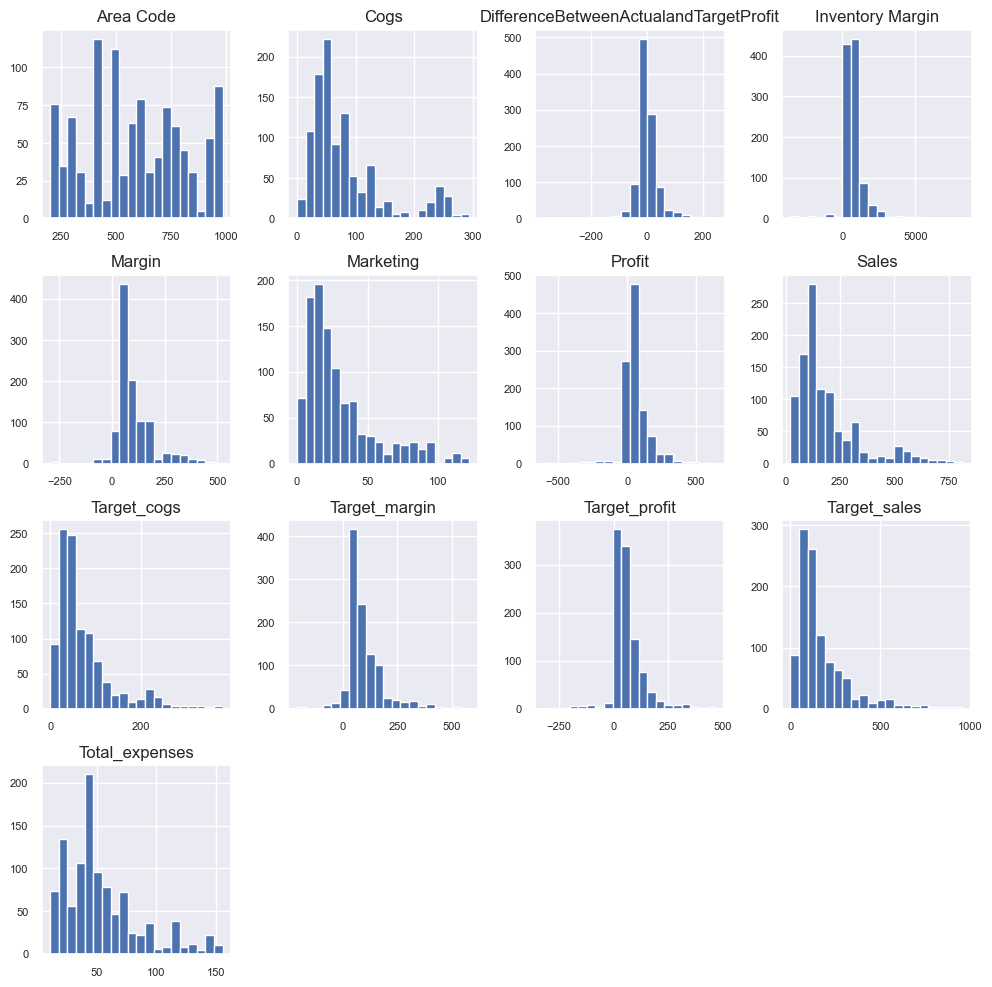

In [83]:
# Plot the histogram for each numeric attribute
ds_numeric.hist(figsize=(12, 12), bins=20, xlabelsize=8, ylabelsize=8)

# Show the plot
plt.show()

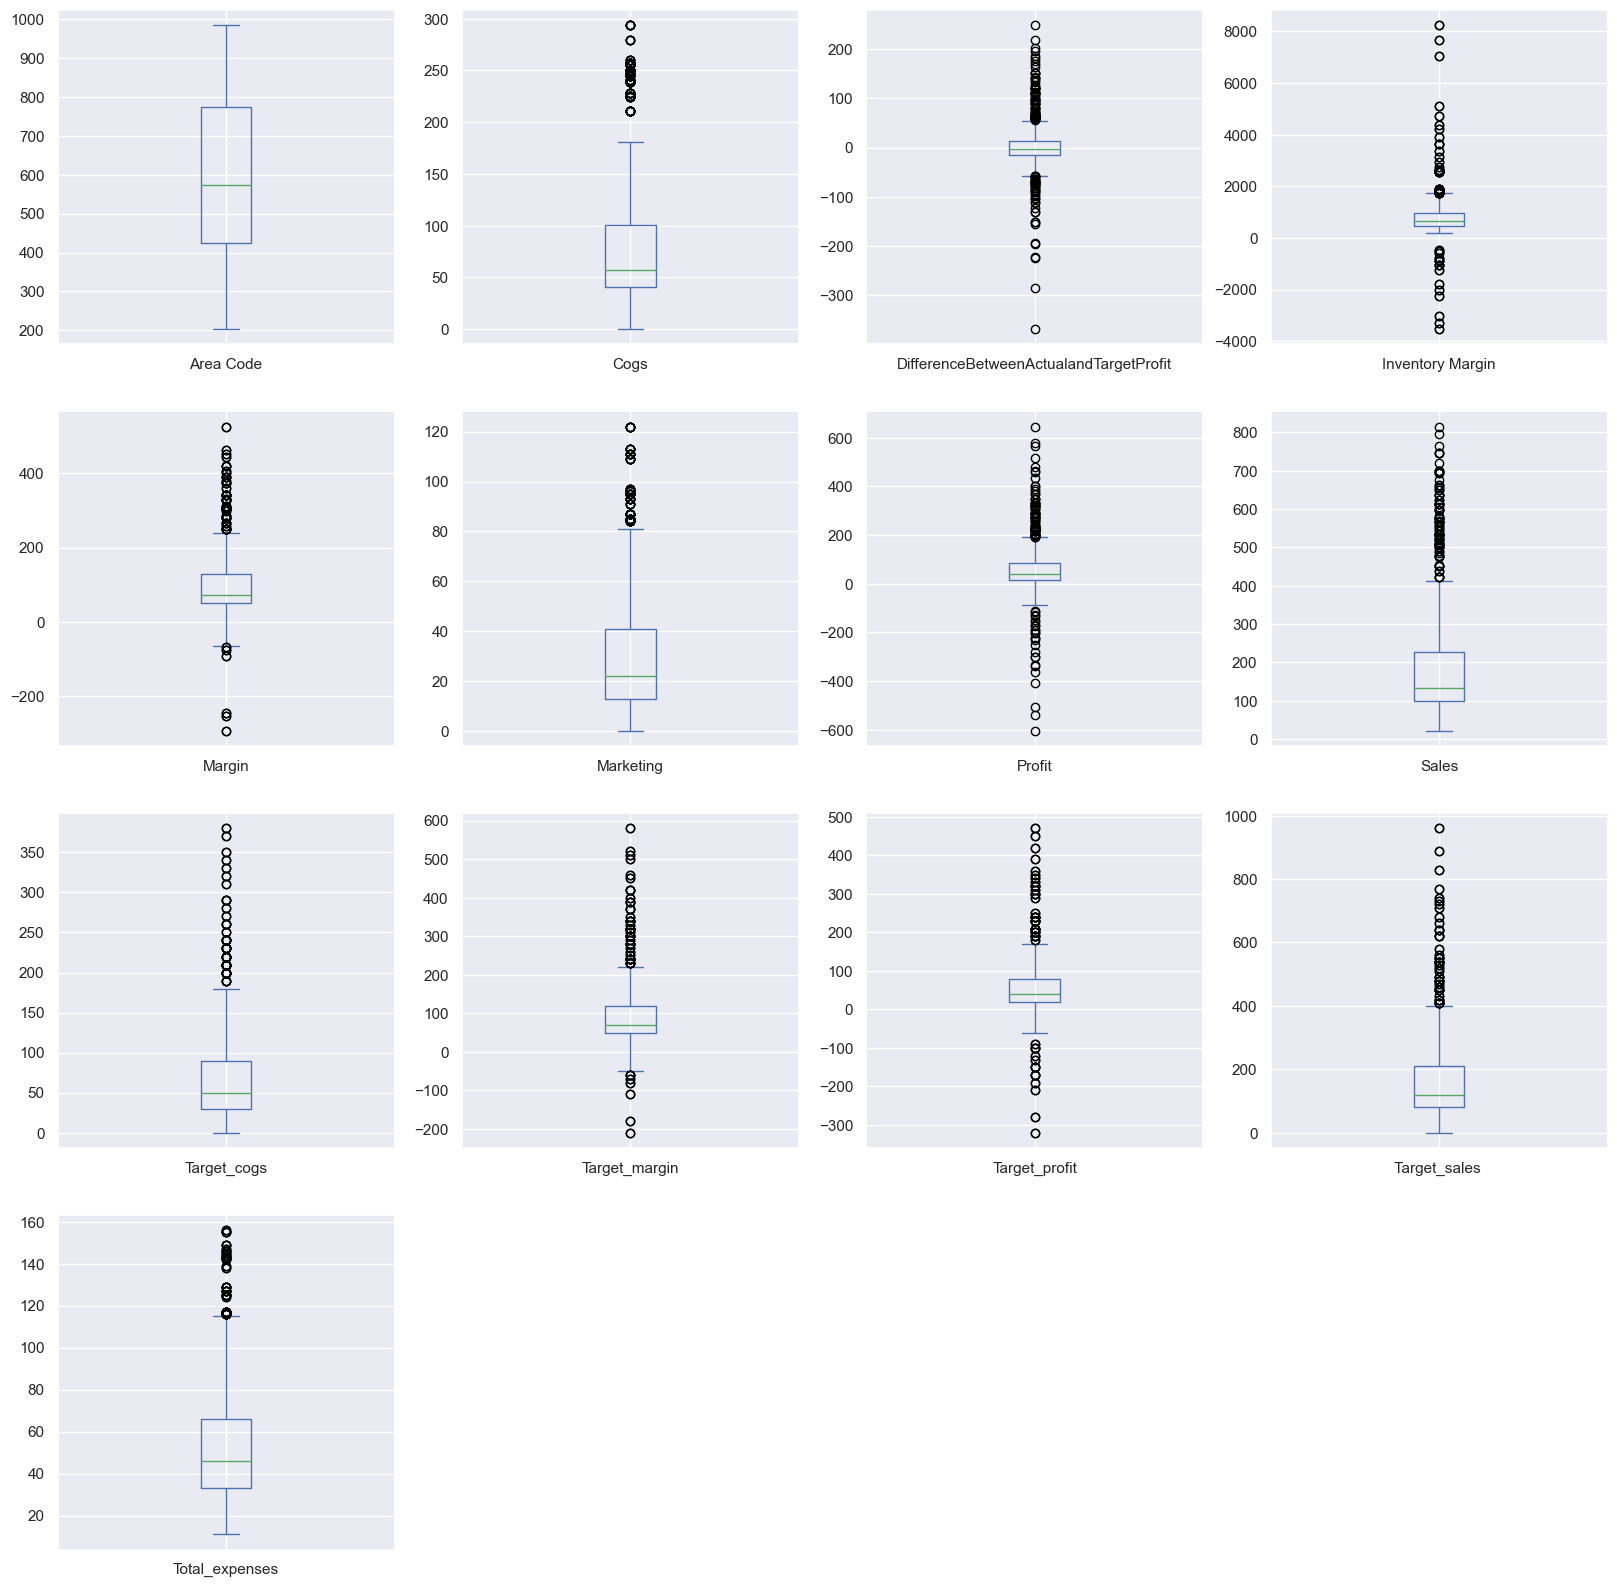

In [84]:
# Plot the boxplot for each numeric attribute
ds_numeric.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(20, 20))

# Show the plot
plt.show()

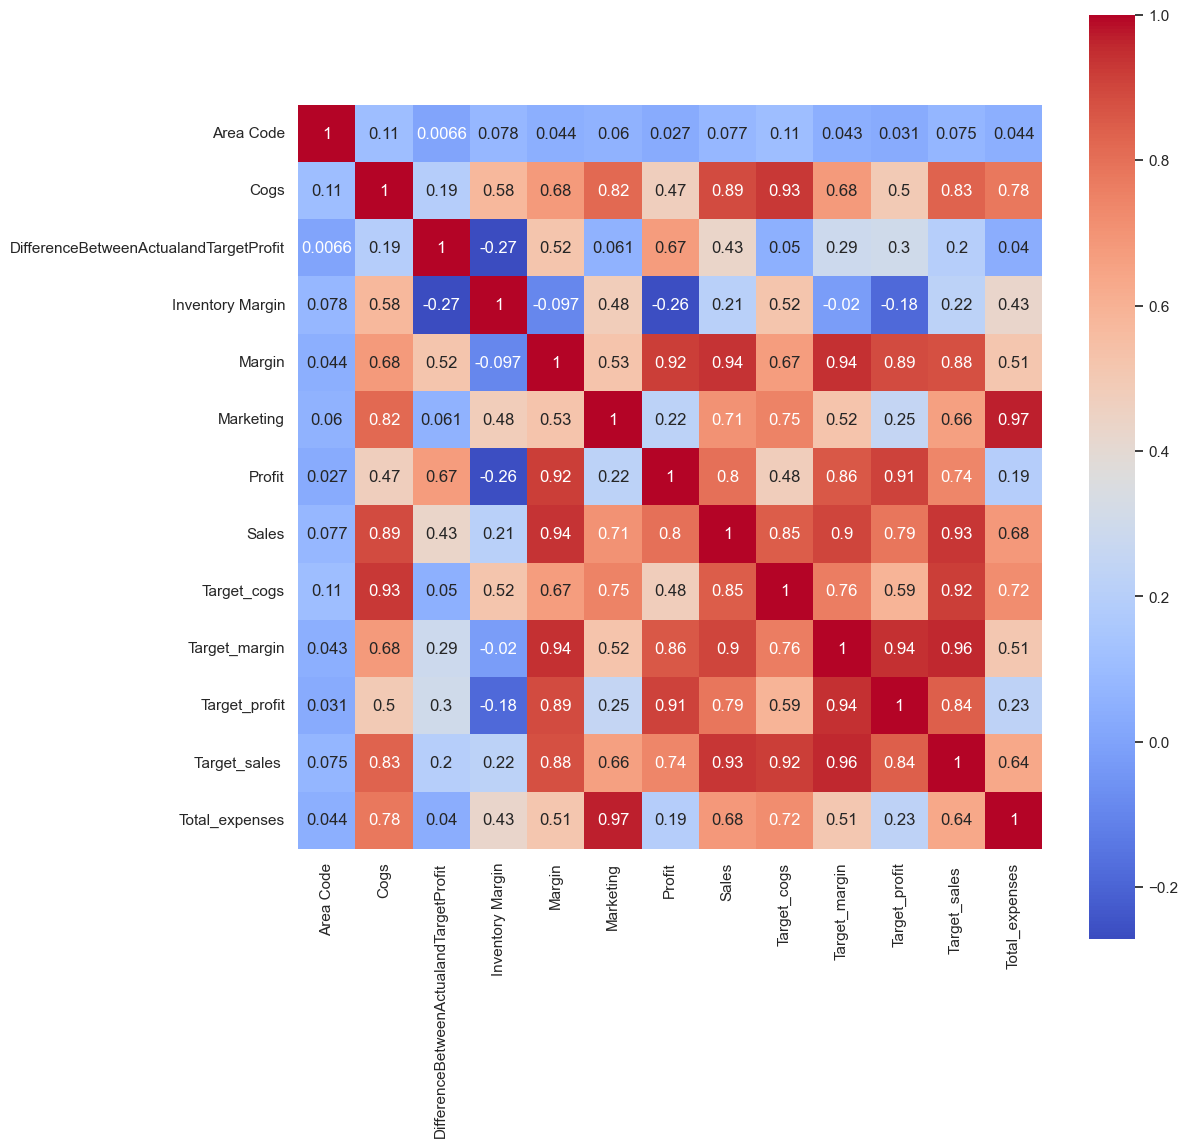

In [85]:
# Plot the correlation matrix heatmap with the help of seaborn library
plt.figure(figsize=(12, 12))
sns.heatmap(ds_numeric.corr(), annot=True, square=True, cmap='coolwarm')

# Show the plot
plt.show()

## Time-based Analysis

- Since the dataset includes a 'Date' attribute, you can perform time-based analysis to identify sales trends and patterns over time.


In [86]:
# Convert the 'Date' column to datetime64 data type
ds['Date'] = pd.to_datetime(ds['Date'])

# Set the 'Date' column as the index of the dataframe
ds.set_index('Date', inplace=True)

# Display the dataframe
ds.head(200)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
Date,,,,,,,,,,,,,,,,,,,,
2012-10-01,303,51,-35,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
2012-10-01,970,52,-24,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2012-10-02,409,43,-22,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
2012-10-03,850,38,-15,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
2012-10-04,562,72,6,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-13,904,80,31,1055,94,Major Market,East,24,Leaves,Herbal Tea,Mint,71,185,Florida,40,50,40,90,46,Decaf
2013-04-14,720,54,-11,404,66,Major Market,Central,20,Leaves,Tea,Darjeeling,19,128,Colorado,30,50,30,80,53,Regular
2013-04-15,970,54,0,1037,64,Major Market,Central,16,Leaves,Tea,Earl Grey,40,126,Colorado,30,50,40,80,37,Regular


- Calculate monthly or quarterly sales totals and visualize them using line charts or time series plots.

In [87]:
# Calculate the monthly sales totals
ds_monthly_sales = ds.resample('M').sum(numeric_only=True)

# Display the monthly sales totals
ds_monthly_sales.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
Date,,,,,,,,,,,,,
2012-10-31,22106,1556,-487,17730,2208,630,873,3764,1040,1920,1360,2960,1335
2012-11-30,14463,1404,-164,17539,1976,524,806,3380,1190,1800,970,2990,1170
2012-12-31,18658,1521,-336,16847,2048,712,814,3717,1080,1860,1150,2940,1464
2013-01-31,16328,1548,344,18321,2157,603,1314,3947,1220,1860,970,3080,1272
2013-02-28,13743,1472,-4,18558,1872,576,886,3510,1090,1600,890,2690,1198


- Identify any seasonality or trends in the data.

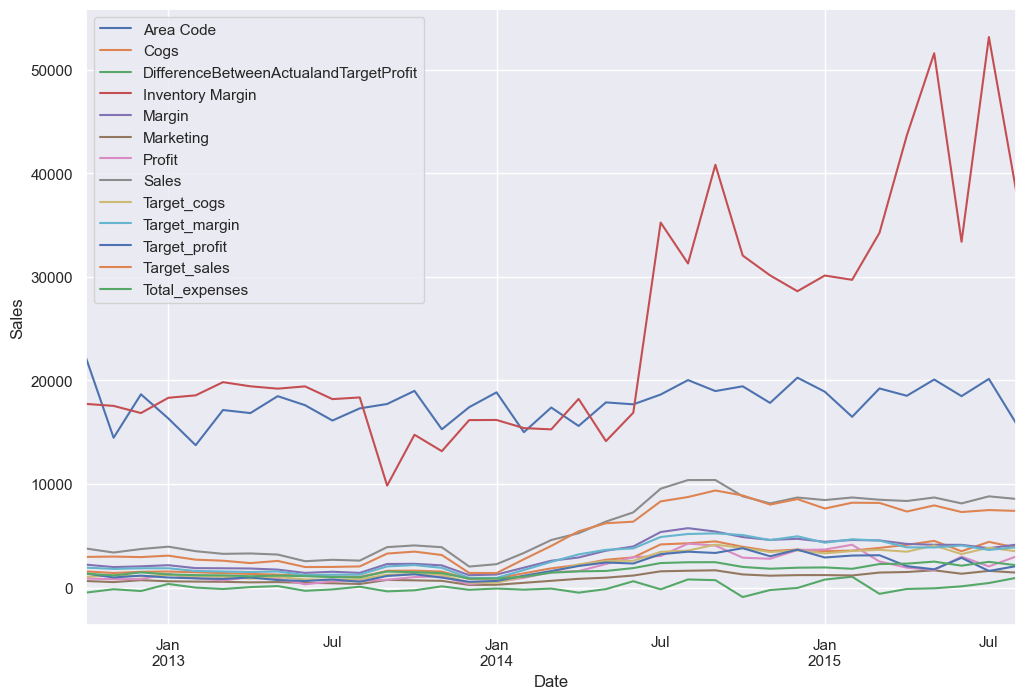

In [88]:
# Plot the monthly sales totals
ds_monthly_sales.plot(figsize=(12, 8), xlabel='Date', ylabel='Sales')

# Show the plot
plt.show()

## Sales Performance Analysis

- Calculate key performance indicators (KPIs) such as profit margin, sales growth, and cost of goods sold (COGS).

In [89]:
# Calculate the profit margin
ds['Profit Margin'] = (ds['Sales'] - ds['Cogs']) / ds['Sales']

# Calculate the sales growth
ds['Sales Growth'] = ds['Sales'].pct_change()

# Calculate the cost of goods sold ('Cogs')
ds['Cogs'] = ds['Sales'] - ds['Profit Margin']

# Display the dataframe (Only display the 'Profit Margin', 'Sales Growth', and 'Cogs' columns)
ds[['Profit Margin', 'Sales Growth', 'Cogs']].head(200)

,Profit Margin,Sales Growth,Cogs
Date,,,
2012-10-01,0.58196721,NaN,121.41803279
2012-10-01,0.57723577,0.00819672,122.42276423
2012-10-02,0.59813084,-0.13008130,106.40186916
2012-10-03,0.59574468,-0.12149533,93.40425532
2012-10-04,0.60439560,0.93617021,181.39560440
...,...,...,...
2013-04-13,0.56756757,0.92708333,184.43243243
2013-04-14,0.57812500,-0.30810811,127.42187500
2013-04-15,0.57142857,-0.01562500,125.42857143


- Analyze the difference between actual and target profit to assess how well the company is meeting its financial goals.

In [90]:
# Calculate the actual profit
ds['Actual Profit'] = ds['Sales'] - ds['Cogs']

# Calculate the target profit
ds['Target Profit'] = ds['Actual Profit'].mean()

# Calculate the difference between actual and target profit
ds['Profit Variance'] = ds['Actual Profit'] - ds['Target Profit']

# Display the dataframe (Only display the 'Actual Profit', 'Target Profit', and 'Profit Variance' columns)
ds[['Actual Profit', 'Target Profit', 'Profit Variance']].head(200)

,Actual Profit,Target Profit,Profit Variance
Date,,,
2012-10-01,0.58196721,0.52090821,0.06105900
2012-10-01,0.57723577,0.52090821,0.05632756
2012-10-02,0.59813084,0.52090821,0.07722263
2012-10-03,0.59574468,0.52090821,0.07483647
2012-10-04,0.60439560,0.52090821,0.08348740
...,...,...,...
2013-04-13,0.56756757,0.52090821,0.04665936
2013-04-14,0.57812500,0.52090821,0.05721679
2013-04-15,0.57142857,0.52090821,0.05052036


## Market Analysis

- Explore the 'Market' and 'Market_size' attributes to understand market dynamics.


In [91]:
# Get the count of the unique values in the 'Market' column
market_counts = ds['Market'].value_counts()

# Get the count of the unique values in the 'Market_size' column
market_size_counts = ds['Market_size'].value_counts()

- Calculate market-specific KPIs and compare performance across different markets.

In [92]:
# Calculate the market-specific KPIs, group the data by 'Market', then apply the KPI calculation functions within each group
market_profit_margin = ds.groupby('Market')['Profit Margin'].mean()

# Calculate the market-specific KPIs, group the data by 'Market_size', then apply the KPI calculation functions within each group
market_size_profit_margin = ds.groupby('Market_size')['Profit Margin'].mean()

- Compare the performance across different markets.

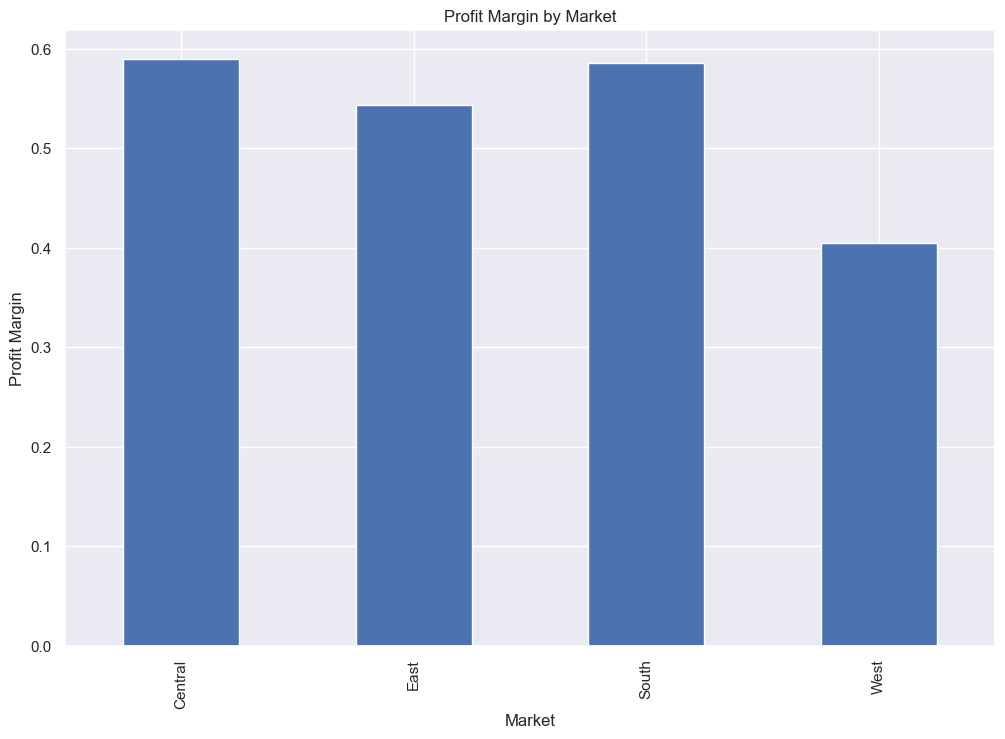

In [93]:
# Plot the profit margin for each market
market_profit_margin.plot(kind='bar', figsize=(12, 8), xlabel='Market', ylabel='Profit Margin', title='Profit Margin by Market')

# Show the plot
plt.show()

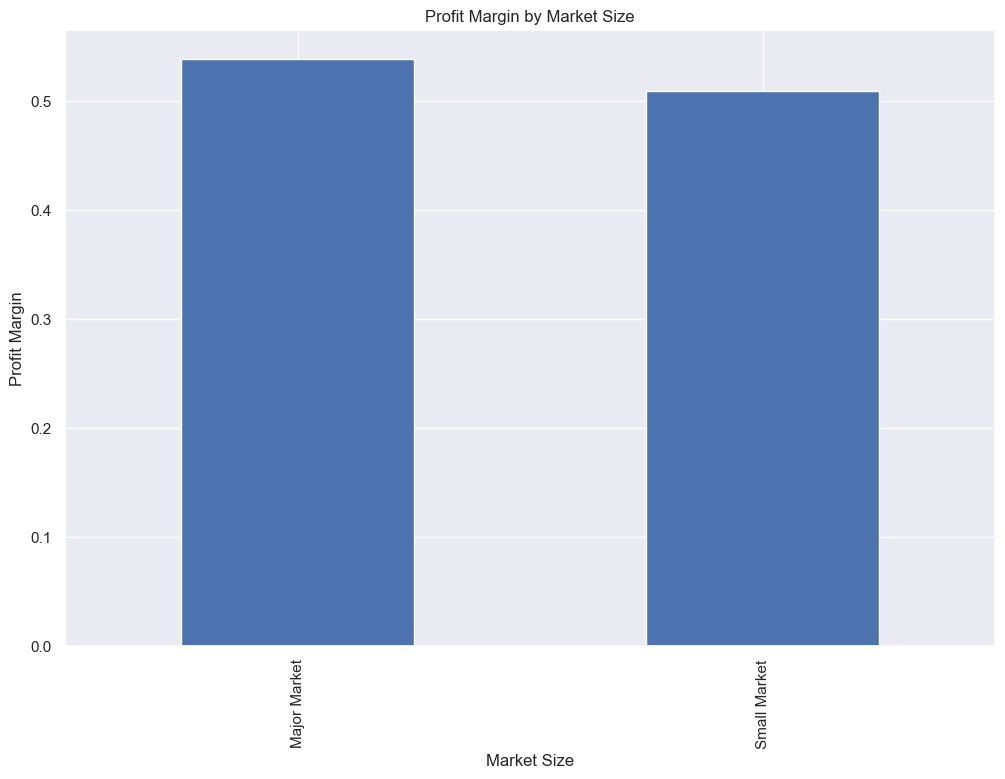

In [94]:
# Plot the profit margin for each market size
market_size_profit_margin.plot(kind='bar', figsize=(12, 8), xlabel='Market Size', ylabel='Profit Margin', title='Profit Margin by Market Size')

# Show the plot
plt.show()

## Product Analysis

- Analyze sales performance by product type, product line, or specific products.


In [95]:
# Analyze sales performance by product type
product_type_sales = ds.groupby('Product_type')['Sales'].sum()

# Display the sales for each product type
print("Sales by Product Type:")
print(product_type_sales)

Sales by Product Type:
Product_type
Coffee        52373
Espresso      56013
Herbal Tea    51685
Tea           42824
Name: Sales, dtype: int64


In [96]:
# Analyze sales performance by product line
product_line_sales = ds.groupby('Product_line')['Sales'].sum()

# Display the sales for each product line
print("\nSales by Product Line:")
print(product_line_sales)


Sales by Product Line:
Product_line
Beans     108386
Leaves     94509
Name: Sales, dtype: int64


In [97]:
# Analyze sales performance by specific products
product_sales = ds.groupby('Product')['Sales'].sum()

# Display the sales for each product
print("\nSales by Product:")
print(product_sales)


Sales by Product:
Product
Amaretto              6781
Caffe Latte           8665
Caffe Mocha          21716
Chamomile            19295
Colombian            30761
Darjeeling           17758
Decaf Espresso       18888
Decaf Irish Cream    14831
Earl Grey            16546
Green Tea             8520
Lemon                24048
Mint                  8342
Regular Espresso      6744
Name: Sales, dtype: int64


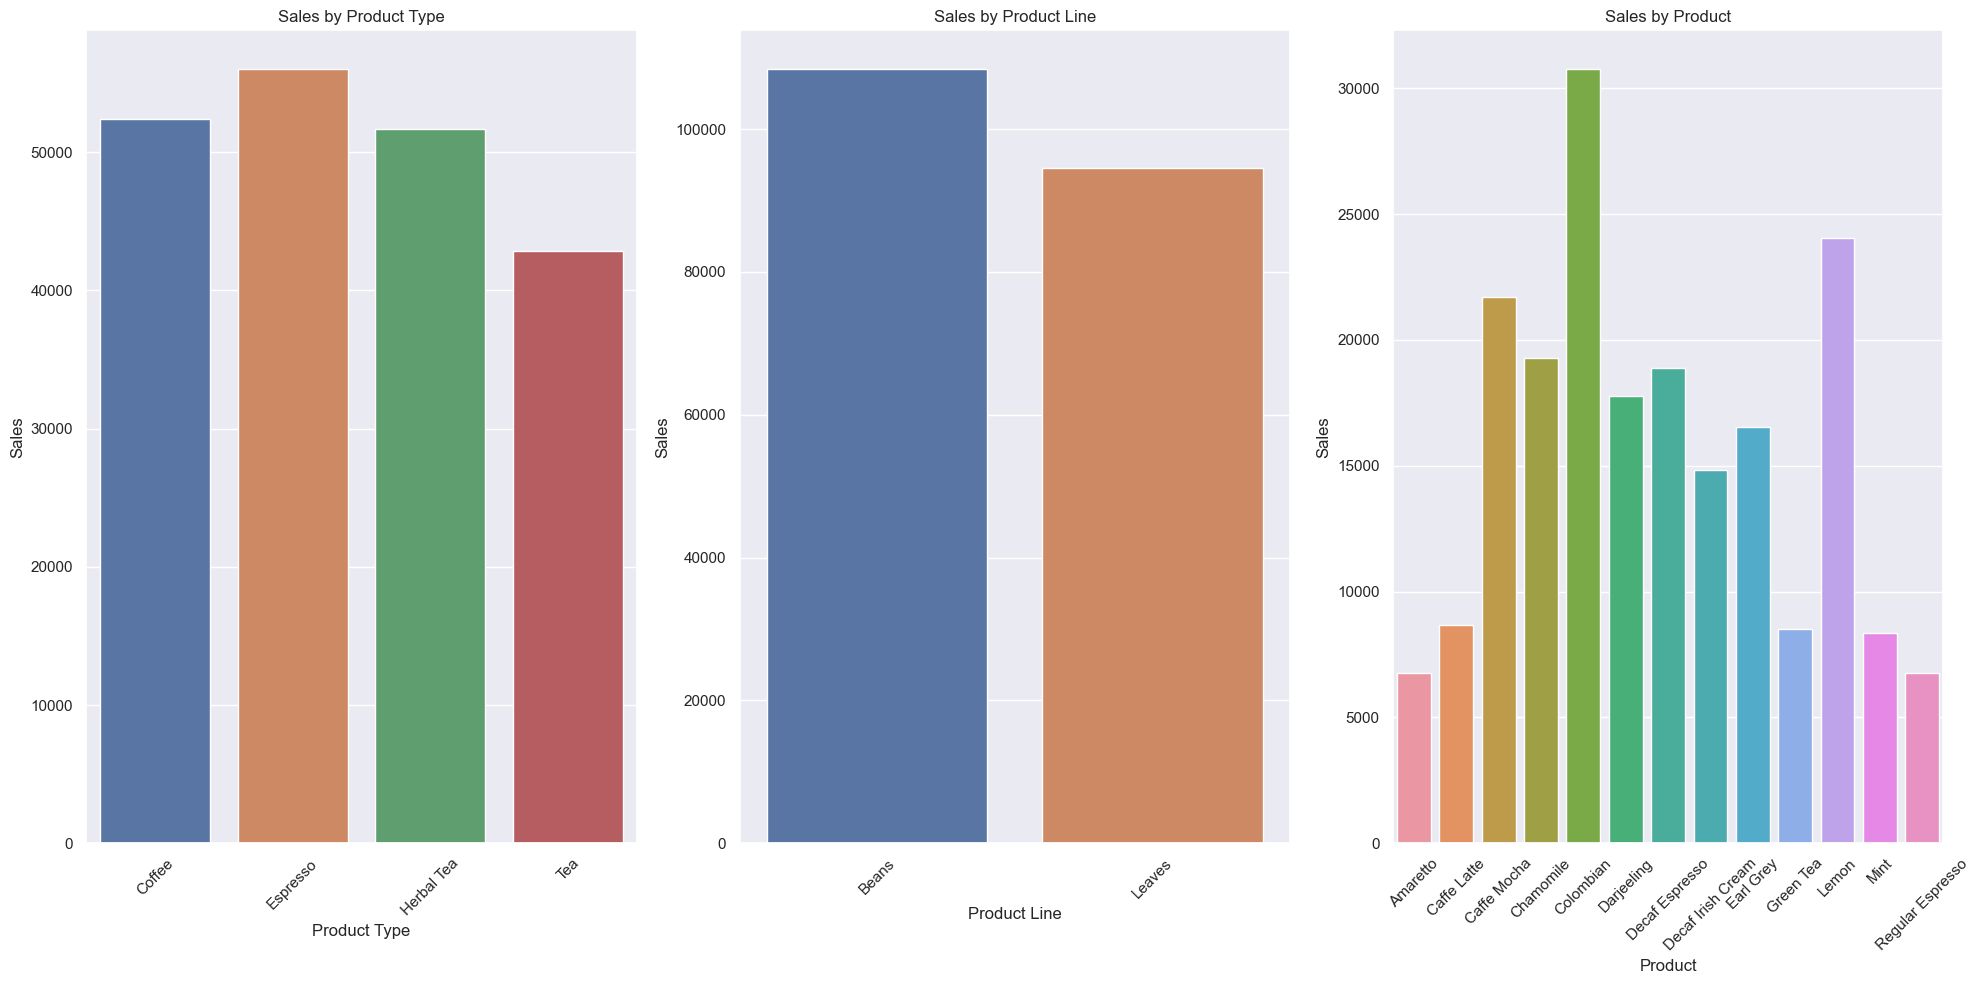

In [98]:
# Set the style of the plots (optional)
sns.set(style="darkgrid")

# Create subplots for sales performance using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Analyze sales performance by product type
product_type_sales = ds.groupby('Product_type')['Sales'].sum()
sns.barplot(x=product_type_sales.index, y=product_type_sales.values, ax=axes[0])
axes[0].set_title("Sales by Product Type")
axes[0].set_xlabel("Product Type")
axes[0].set_ylabel("Sales")
axes[0].tick_params(axis='x', rotation=45)

# Analyze sales performance by product line
product_line_sales = ds.groupby('Product_line')['Sales'].sum()
sns.barplot(x=product_line_sales.index, y=product_line_sales.values, ax=axes[1])
axes[1].set_title("Sales by Product Line")
axes[1].set_xlabel("Product Line")
axes[1].set_ylabel("Sales")
axes[1].tick_params(axis='x', rotation=45)

# Analyze sales performance by specific products
product_sales = ds.groupby('Product')['Sales'].sum()
sns.barplot(x=product_sales.index, y=product_sales.values, ax=axes[2])
axes[2].set_title("Sales by Product")
axes[2].set_xlabel("Product")
axes[2].set_ylabel("Sales")
axes[2].tick_params(axis='x', rotation=45)

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

- Calculate profit margins and sales for each product category.

In [99]:
# Calculate profit margin by product type
product_type_profit_margin = ds.groupby('Product_type')['Profit Margin'].mean()
print("\nProfit Margin by Product Type:")
print(product_type_profit_margin)


Profit Margin by Product Type:
Product_type
Coffee       0.56042754
Espresso     0.57374985
Herbal Tea   0.55357483
Tea          0.37677265
Name: Profit Margin, dtype: float64


In [100]:
# Calculate profit margin by product line
product_line_profit_margin = ds.groupby('Product_line')['Profit Margin'].mean()
print("\nProfit Margin by Product Line:")
print(product_line_profit_margin)


Profit Margin by Product Line:
Product_line
Beans    0.56744682
Leaves   0.46938332
Name: Profit Margin, dtype: float64


In [101]:
# Calculate profit margin by specific products
product_profit_margin = ds.groupby('Product')['Profit Margin'].mean()
print("\nProfit Margin by Product:")
print(product_profit_margin)


Profit Margin by Product:
Product
Amaretto             0.50728259
Caffe Latte          0.62771933
Caffe Mocha          0.51743225
Chamomile            0.59443124
Colombian            0.60704110
Darjeeling           0.59856882
Decaf Espresso       0.60921072
Decaf Irish Cream    0.52873305
Earl Grey            0.58586006
Green Tea           -0.12804297
Lemon                0.57320078
Mint                 0.42279710
Regular Espresso     0.58634725
Name: Profit Margin, dtype: float64


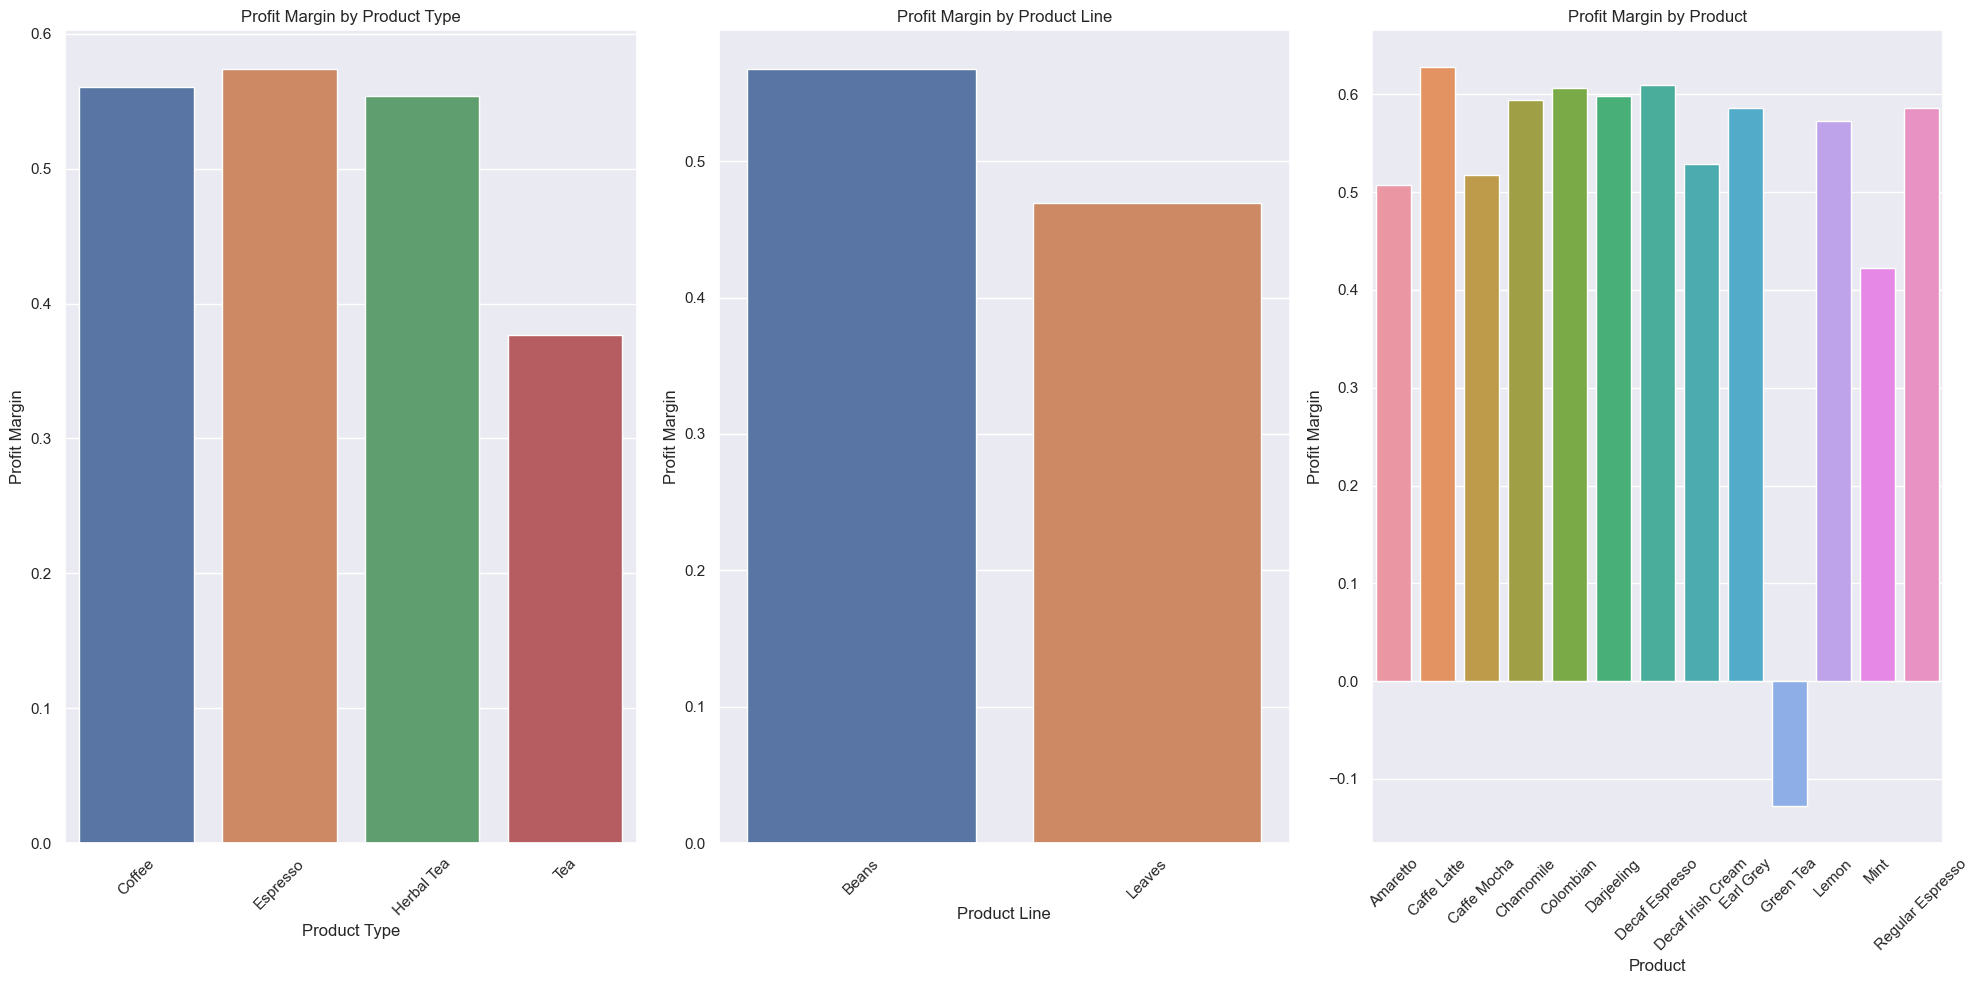

In [102]:
# Set the style of the plots (optional)
sns.set(style="darkgrid")

# Create subplots for profit margins using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Calculate profit margin by product type
product_type_profit_margin = ds.groupby('Product_type')['Profit Margin'].mean()
sns.barplot(x=product_type_profit_margin.index, y=product_type_profit_margin.values, ax=axes[0])
axes[0].set_title("Profit Margin by Product Type")
axes[0].set_xlabel("Product Type")
axes[0].set_ylabel("Profit Margin")
axes[0].tick_params(axis='x', rotation=45)

# Calculate profit margin by product line
product_line_profit_margin = ds.groupby('Product_line')['Profit Margin'].mean()
sns.barplot(x=product_line_profit_margin.index, y=product_line_profit_margin.values, ax=axes[1])
axes[1].set_title("Profit Margin by Product Line")
axes[1].set_xlabel("Product Line")
axes[1].set_ylabel("Profit Margin")
axes[1].tick_params(axis='x', rotation=45)

# Calculate profit margin by specific products
product_profit_margin = ds.groupby('Product')['Profit Margin'].mean()
sns.barplot(x=product_profit_margin.index, y=product_profit_margin.values, ax=axes[2])
axes[2].set_title("Profit Margin by Product")
axes[2].set_xlabel("Product")
axes[2].set_ylabel("Profit Margin")
axes[2].tick_params(axis='x', rotation=45)

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

- Identify the best-selling and least-selling products.

In [103]:
# Identify best-selling products
best_selling_products = product_sales.sort_values(ascending=False)
print("\nBest-Selling Products:")
print(best_selling_products)


Best-Selling Products:
Product
Colombian            30761
Lemon                24048
Caffe Mocha          21716
Chamomile            19295
Decaf Espresso       18888
Darjeeling           17758
Earl Grey            16546
Decaf Irish Cream    14831
Caffe Latte           8665
Green Tea             8520
Mint                  8342
Amaretto              6781
Regular Espresso      6744
Name: Sales, dtype: int64


In [104]:
# Identify least-selling products
least_selling_products = product_sales.sort_values(ascending=True)
print("\nLeast-Selling Products:")
print(least_selling_products)


Least-Selling Products:
Product
Regular Espresso      6744
Amaretto              6781
Mint                  8342
Green Tea             8520
Caffe Latte           8665
Decaf Irish Cream    14831
Earl Grey            16546
Darjeeling           17758
Decaf Espresso       18888
Chamomile            19295
Caffe Mocha          21716
Lemon                24048
Colombian            30761
Name: Sales, dtype: int64


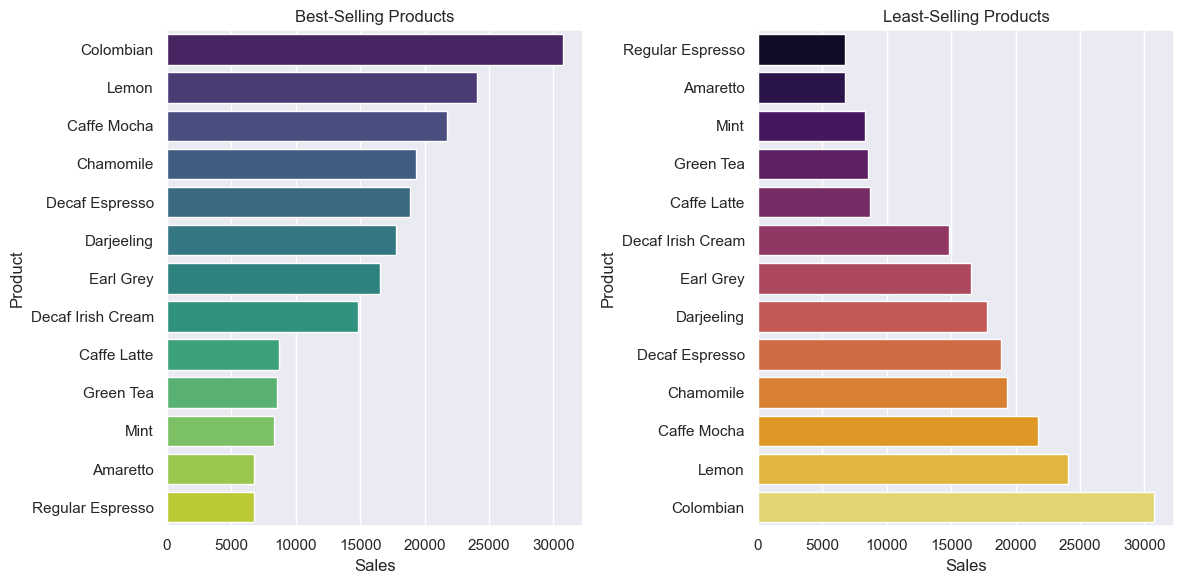

In [105]:
sns.set(style="darkgrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the best-selling products
sns.barplot(x=best_selling_products.values, y=best_selling_products.index, ax=axes[0], palette="viridis")
axes[0].set_title("Best-Selling Products")
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Product")

# Plot the least-selling products
sns.barplot(x=least_selling_products.values, y=least_selling_products.index, ax=axes[1], palette="inferno")
axes[1].set_title("Least-Selling Products")
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Product")

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

## Geographical Analysis

- Explore sales and profit data by 'State' to identify regional variations.
- Visualize the data using maps and heatmaps.

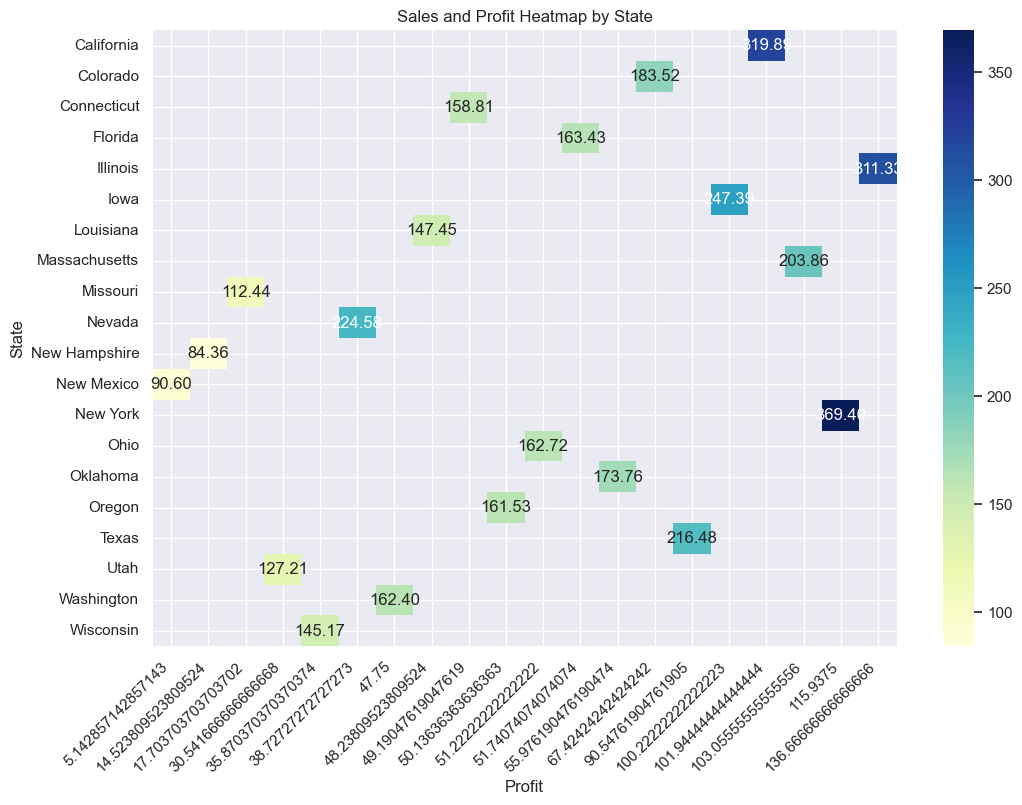

In [122]:
# Group the data by 'State' and calculate the sales and profit
region_data = ds.groupby('State')[['Sales', 'Profit']].mean().reset_index()

# Display a heatmap to visualize the data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data=region_data.pivot(index='State', columns='Profit', values='Sales'), cmap='YlGnBu', annot=True, fmt=".2f")

# Adjust the layout for better readability (Rotate the x-axis labels by 45 degrees)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Sales and Profit Heatmap by State')
plt.show()